# Week 3 - Sensitivity analysis

This exercise uses the same predator-prey model we used for the multi-model exercise, focusing on the Python version. As with the other exercise, define a model object for the function below, with the uncertainty ranges provided:

|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging, ScalarOutcome)

from ema_workbench import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [7]:
def pred_prey(prey_birth_rate=0.025, predation_rate=0.0015, predator_efficiency=0.002,
             predator_loss_rate=0.06, initial_prey=50, initial_predators=20, dt=0.25,
             final_time=365, reps=1):

    #Initial values
    predators = np.zeros((reps, int(final_time/dt)+1))
    prey = np.zeros((reps, int(final_time/dt)+1))
    sim_time = np.zeros((reps, int(final_time/dt)+1))

    for r in range(reps):

        predators[r,0] = initial_predators
        prey[r,0] = initial_prey

    #Calculate the time series
    for t in range(0, sim_time.shape[1]-1):

        dx = (prey_birth_rate*prey[r,t]) - (predation_rate*prey[r,t]*predators[r,t])
        dy = (predator_efficiency*predators[r,t]*prey[r,t]) - (predator_loss_rate*predators[r,t])

        prey[r,t+1] = max(prey[r,t] + dx*dt, 0)
        predators[r,t+1] = max(predators[r,t] + dy*dt, 0)
        sim_time[r,t+1] = (t+1)*dt

    #Return outcomes
    return {'TIME':sim_time,
            'predators':predators,
            'prey':prey}

In [8]:
# Instantiate Python Model
model = Model('PredPreyModel', function=pred_prey)


# Define uncertainties and outcomes
model.uncertainties = [
    RealParameter('prey_birth_rate', 0.015, 0.035),
    RealParameter('predation_rate', 0.0005, 0.003),
    RealParameter('predator_efficiency', 0.001, 0.004),
    RealParameter('predator_loss_rate', 0.04, 0.08)
]

model.outcomes = [
    TimeSeriesOutcome('TIME'),
    TimeSeriesOutcome('predators'),
    TimeSeriesOutcome('prey')
]



In [9]:
results = perform_experiments(model, 50)

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 563.88it/s]


In [10]:
experiments, outcomes = results

In [11]:
outcomes

{'TIME': array([[[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]],
 
        [[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]],
 
        [[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]],
 
        ...,
 
        [[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]],
 
        [[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]],
 
        [[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02,
          3.6475e+02, 3.6500e+02]]], shape=(50, 1, 1461)),
 'predators': array([[[ 20.        ,  20.48342329,  20.97998711, ...,  18.57434029,
           19.0636572 ,  19.56756693]],
 
        [[ 20.        ,  20.10437955,  20.21113646, ...,  37.42934162,
           37.128164  ,  36.82967216]],
 
        [[ 20.        ,  20.16763414,  20.3352812 , ...,  25.04950728,
           25.21289507,  25.37450691]],


In [12]:
experiments

,predation_rate,predator_efficiency,predator_loss_rate,prey_birth_rate,scenario,policy,model
0,0.000948,0.003241,0.065364,0.025982,0,None,PredPreyModel
1,0.000757,0.001791,0.068663,0.031424,1,None,PredPreyModel
2,0.002284,0.001545,0.043733,0.031378,2,None,PredPreyModel
3,0.002488,0.002669,0.050694,0.032169,3,None,PredPreyModel
4,0.001919,0.002695,0.074067,0.032489,4,None,PredPreyModel
5,0.000950,0.003949,0.052156,0.030055,5,None,PredPreyModel
6,0.000707,0.002003,0.071672,0.017110,6,None,PredPreyModel
7,0.001625,0.003695,0.049939,0.020759,7,None,PredPreyModel
8,0.001265,0.003524,0.054964,0.018056,8,None,PredPreyModel
9,0.001475,0.002040,0.072436,0.028650,9,None,PredPreyModel


#### 1. Sensitivity analysis
Sensitivity analysis often focuses on the final values of an outcome at the end of the simulation. However, we can also look at metrics that give us additional information about the behavior of the model over time. Using [the statsmodel library](https://www.statsmodels.org/stable/index.html) and an appropriate sampling design, fit a linear regression model for each of the following indicators. What can we conclude about the behavior of the model, and about the importance of the different inputs?

  * The final values of the _prey_ outcome
  * The mean values of the _prey_ outcome over time, within each experiment
  * The standard deviations of the _prey_ outcome over time, within each experiment

In [13]:
import numpy as np
import pandas as pd

# Access only the prey outcome
prey = outcomes['prey']  # shape: (n_experiments, 1, n_timesteps)

# Remove singleton dimension: (n_experiments, n_timesteps)
prey = prey[:, 0, :]

# Compute metrics
final_values = prey[:, -1]
mean_values = prey.mean(axis=1)
std_dev_values = prey.std(axis=1)

# Combine into a DataFrame
df_metrics = pd.DataFrame({
    'final_prey': final_values,
    'mean_prey': mean_values,
    'std_prey': std_dev_values
})
df_metrics

,final_prey,mean_prey,std_prey
0,52.895873,20.267638,15.438576
1,20.401862,39.315291,15.170429
2,44.601545,28.777217,14.729658
3,54.118257,18.998544,16.237595
4,22.461406,26.011049,13.369108
5,5.846827,11.207482,15.159045
6,49.767511,35.592469,9.344130
7,1.197467,12.795822,15.235650
8,2.307581,14.707235,15.303563
9,26.920049,34.797736,9.605879


In [14]:
# Keep only the columns needed for sensitivity analysis
df_inputs = experiments[['predation_rate', 'predator_efficiency', 'predator_loss_rate', 'prey_birth_rate']].copy()


In [15]:
import statsmodels.api as sm

# Add constant for intercept
X = sm.add_constant(df_inputs)

# Dictionary to store models
regression_models = {}

for target in ['final_prey', 'mean_prey', 'std_prey']:
    y = df_metrics[target]
    regression_model = sm.OLS(y, X).fit()
    regression_models[target] = regression_model
    print(f"\n📈 Regression summary for {target}:\n")
    print(regression_model.summary())


📈 Regression summary for final_prey:

                            OLS Regression Results                            
Dep. Variable:             final_prey   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     7.946
Date:                Fri, 16 May 2025   Prob (F-statistic):           6.20e-05
Time:                        12:23:25   Log-Likelihood:                -207.31
No. Observations:                  50   AIC:                             424.6
Df Residuals:                      45   BIC:                             434.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### 2. SOBOL
Use the Sobol sampling functionality included in the Workbench to perform experiments with a sample size of N=50, then analyze the results with SALib for the same three indicators. This requires specifying the keyword argument `'uncertainty_sampling'` of perform_experiments. Note that when using Sobol sampling, the meaning of the keyword argument `scenarios` changes a bit. In order to properly estimate Sobol scores as well as interaction effects, you require N * (2D+2) scenarios, where D is the number of uncertain parameters, and N is the value for scenarios passed to `perform_experiments`. Repeat the analysis for larger sample sizes, with N=250 and N=1000. How can we interpret the first-order and total indices? Are these sample sizes sufficient for a stable estimation of the indices? You'll need to use the [get_SALib_problem](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/em_framework/salib_samplers.html) function to convert your Workbench experiments to a problem definition that you can pass to the SALib analysis function.

*hint*: sobol is a deterministic sequence of quasi random numbers. Thus, you can run with N=1000 and simply use slicing to get the results for N=50 and N=250.

In [17]:
from ema_workbench import perform_experiments, Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
import numpy as np

# Step 1: Run Sobol Sampling Experiments
N = 1000  # Base sample size
sobol_results = perform_experiments(
    model,
    scenarios=N,
    uncertainty_sampling=Samplers.SOBOL
)

sobol_experiments, sobol_outcomes = sobol_results

# Step 2: Get the SALib problem definition from EMA model
problem = get_SALib_problem(model.uncertainties)
D = len(problem['names'])  # number of uncertain parameters

# Step 3: Extract and preprocess the prey outcome
sobol_prey = sobol_outcomes['prey'][:, 0, :]  # Shape: (n_rows, time_steps)

# Step 4: Define helper functions
def compute_indicators(prey_array):
    return {
        'final_prey': prey_array[:, -1],
        'mean_prey': prey_array.mean(axis=1),
        'std_prey': prey_array.std(axis=1)
    }

def run_sobol_analysis(prey_array, N):
    total_rows = N * (D + 2)  # Correct for calc_second_order=False

    if prey_array.shape[0] < total_rows:
        raise ValueError(f"Not enough rows: needed {total_rows}, got {prey_array.shape[0]}")

    sliced_prey = prey_array[:total_rows]
    indicators = compute_indicators(sliced_prey)

    result = {}
    for name, output in indicators.items():
        output = output.flatten()
        if output.shape[0] != total_rows:
            raise ValueError(f"Output length mismatch for {name}: expected {total_rows}, got {output.shape[0]}")
        result[name] = sobol.analyze(problem, output, calc_second_order=False)

    return result

# Step 5: Perform Sobol analysis for N = 50, 250, 1000
sobol_results_by_N = {}
for n_val in [50, 250, 1000]:
    sobol_results_by_N[n_val] = run_sobol_analysis(sobol_prey, n_val)


C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\scipy\stats\_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
100%|███████████████████████████████████| 10000/10000 [00:18<00:00, 549.15it/s]
C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))



========== Sobol Results (N=50) ==========

▶ Indicator: final_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.287573,0.268435,0.597927,0.251131
predator_efficiency,0.161296,0.348978,0.706579,0.271516
predator_loss_rate,0.410751,0.441712,0.701516,0.257321
prey_birth_rate,-0.016066,0.496983,1.004160,0.274649


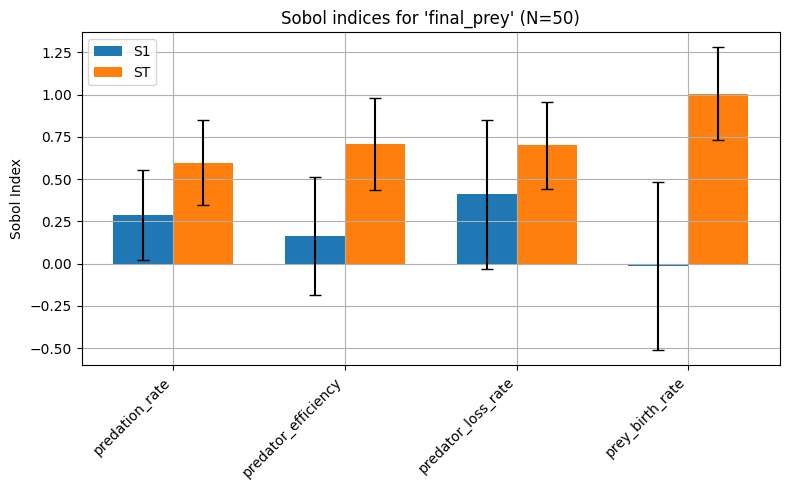


▶ Indicator: mean_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.027907,0.203425,0.440981,0.292786
predator_efficiency,0.370255,0.314594,0.516917,0.245608
predator_loss_rate,0.410493,0.308306,0.519820,0.227680
prey_birth_rate,0.109374,0.414661,0.725919,0.314754


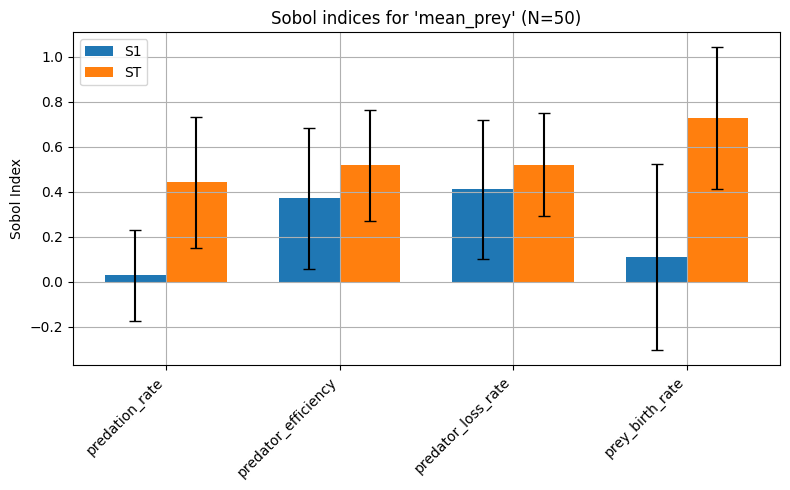


▶ Indicator: std_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.003818,0.295987,0.737595,0.617353
predator_efficiency,0.493201,0.513232,1.196014,0.617335
predator_loss_rate,0.755748,0.437418,1.195031,0.492872
prey_birth_rate,0.738601,0.576180,1.880016,0.796624


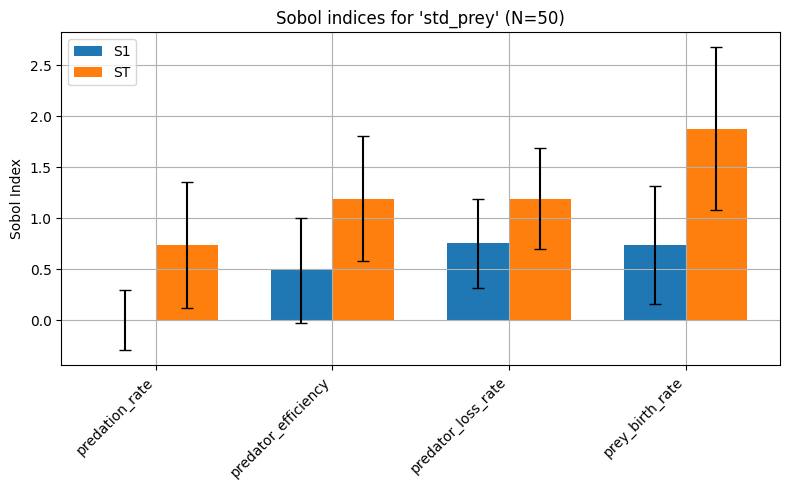


========== Sobol Results (N=250) ==========

▶ Indicator: final_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.151754,0.179728,0.604115,0.098904
predator_efficiency,0.125150,0.145498,0.753999,0.129301
predator_loss_rate,0.271053,0.182886,0.712811,0.148301
prey_birth_rate,0.208588,0.214579,0.870685,0.125691


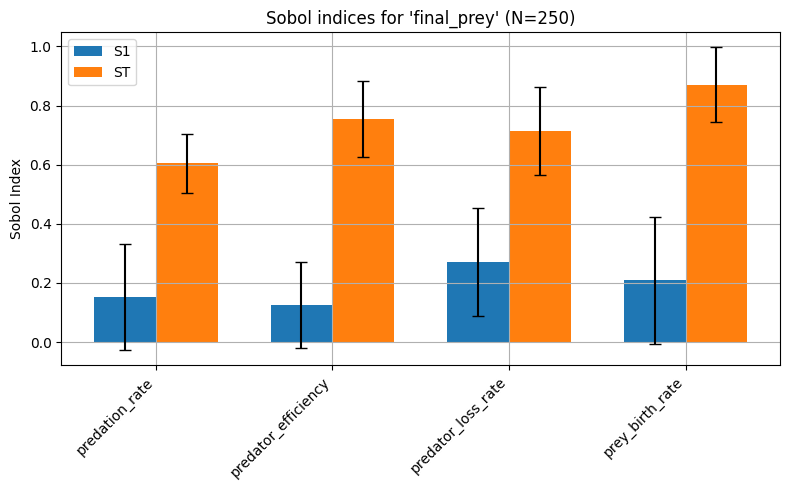


▶ Indicator: mean_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.044136,0.168074,0.533345,0.132227
predator_efficiency,0.411464,0.225360,0.657776,0.131323
predator_loss_rate,0.442096,0.174145,0.625375,0.135901
prey_birth_rate,0.291733,0.202375,0.846454,0.134797


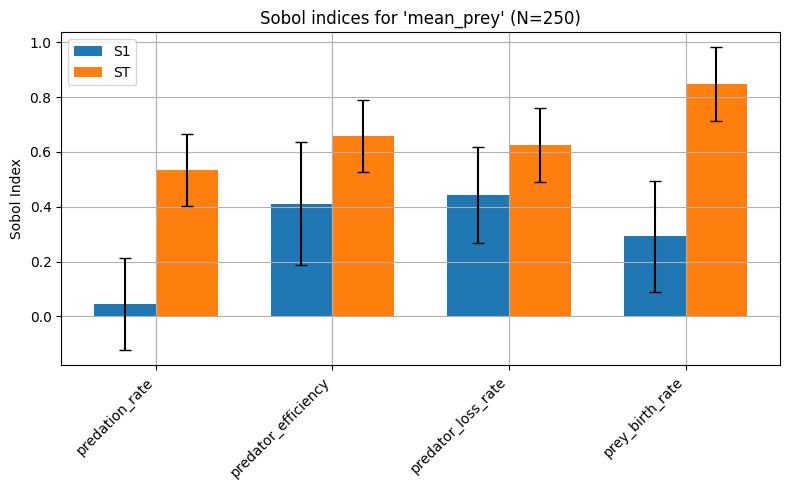


▶ Indicator: std_prey


,S1,S1_conf,ST,ST_conf
predation_rate,-0.071329,0.145601,0.527552,0.159306
predator_efficiency,0.366395,0.211806,0.828406,0.227932
predator_loss_rate,0.263384,0.202750,0.645351,0.190848
prey_birth_rate,0.362376,0.220773,0.967909,0.253232


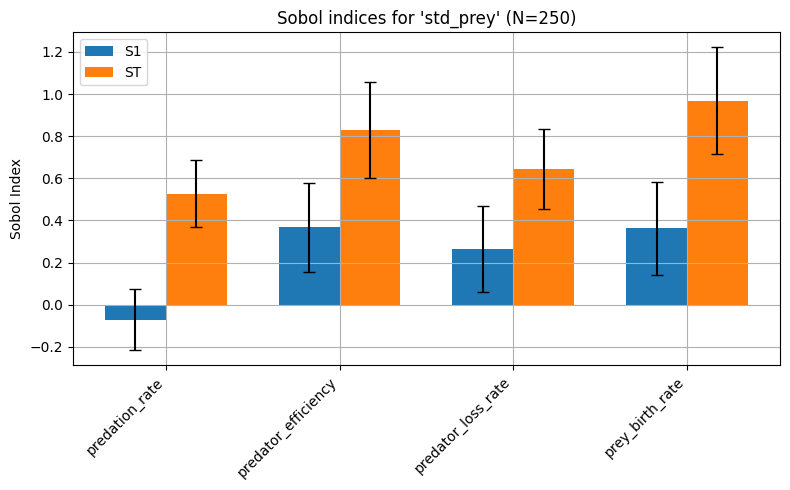


========== Sobol Results (N=1000) ==========

▶ Indicator: final_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.159624,0.094536,0.676161,0.079677
predator_efficiency,0.150147,0.091323,0.830119,0.071296
predator_loss_rate,0.229171,0.085912,0.760997,0.083285
prey_birth_rate,0.253605,0.094082,1.015654,0.097651


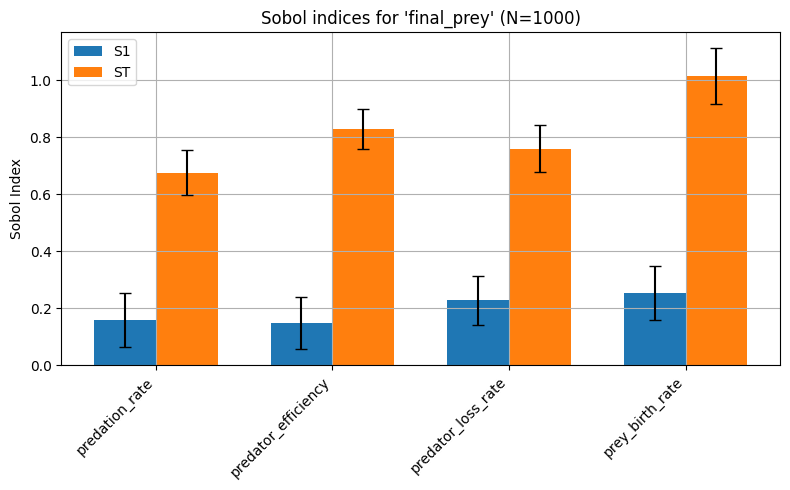


▶ Indicator: mean_prey


,S1,S1_conf,ST,ST_conf
predation_rate,0.013392,0.079766,0.575518,0.077418
predator_efficiency,0.297302,0.107516,0.693201,0.077462
predator_loss_rate,0.418924,0.087402,0.603732,0.074384
prey_birth_rate,0.281342,0.124145,0.899600,0.093330


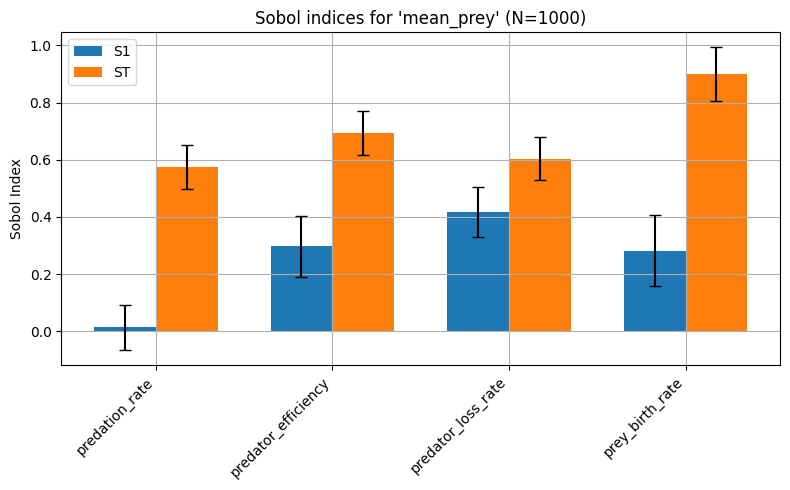


▶ Indicator: std_prey


,S1,S1_conf,ST,ST_conf
predation_rate,-0.083840,0.084260,0.634487,0.104866
predator_efficiency,0.339848,0.125989,0.827030,0.116058
predator_loss_rate,0.283161,0.123246,0.740606,0.107727
prey_birth_rate,0.381956,0.129563,0.970489,0.140457


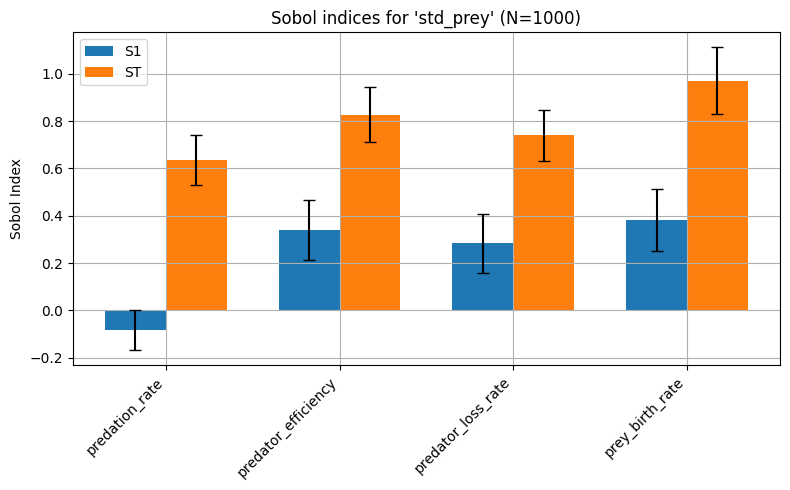

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Summary Table Function ----
def summarize_sobol_result(Si, parameter_names):
    return pd.DataFrame({
        'S1': Si['S1'],
        'S1_conf': Si['S1_conf'],
        'ST': Si['ST'],
        'ST_conf': Si['ST_conf']
    }, index=parameter_names)

# ---- Bar Plot Function ----
def plot_sobol_indices(Si, title, parameter_names):
    x = np.arange(len(parameter_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, Si['S1'], width, yerr=Si['S1_conf'], label='S1', capsize=4)
    ax.bar(x + width/2, Si['ST'], width, yerr=Si['ST_conf'], label='ST', capsize=4)

    ax.set_ylabel('Sobol Index')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(parameter_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# ---- Loop to Show Tables and Plots ----
for N, indicators in sobol_results_by_N.items():
    print(f"\n========== Sobol Results (N={N}) ==========")
    for name, Si in indicators.items():
        print(f"\n▶ Indicator: {name}")
        display(summarize_sobol_result(Si, problem['names']))
        plot_sobol_indices(Si, f"Sobol indices for '{name}' (N={N})", problem['names'])

#### 3. Extra trees
Use the [Extra-Trees analysis](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/feature_scoring.html) included in the Workbench to approximate the Sobol total indices, with a suitable sampling design. As a starting point, use an ensemble of 100 trees and a max_features parameter of 0.6, and set the analysis to regression mode. Are the estimated importances stable relative to the sample size and the analysis parameters? How do the results compare to the Sobol indices? For more details on this analysis see [Jaxa-Rozen & Kwakkel (2018)](https://www.sciencedirect.com/science/article/pii/S1364815217311581)

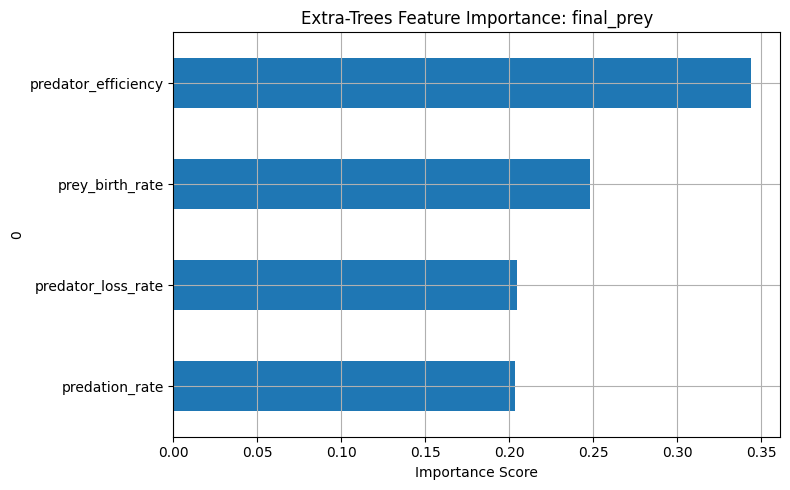

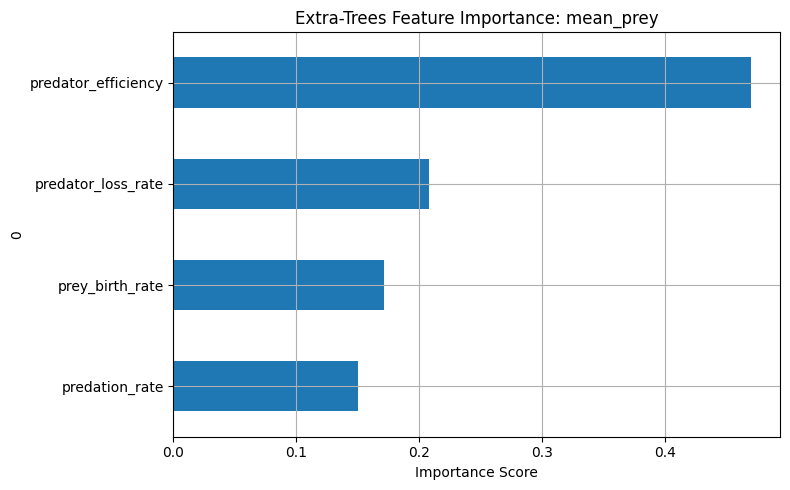

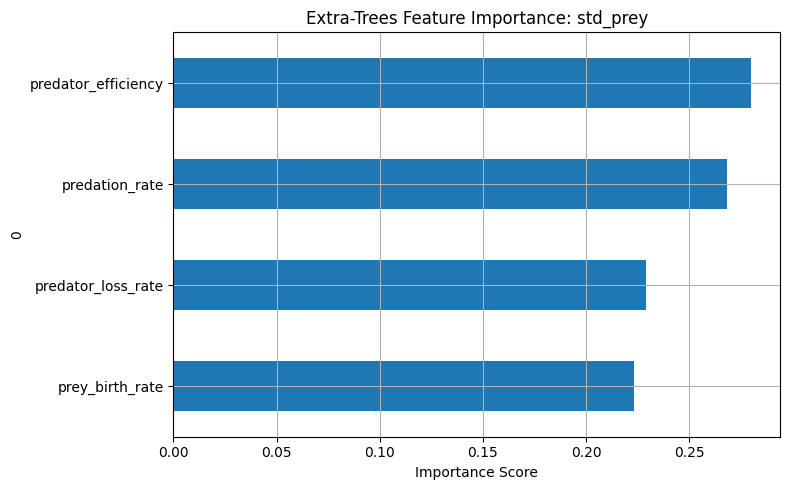

In [25]:
# Import libraries
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.feature_scoring import RuleInductionType
import matplotlib.pyplot as plt
import pandas as pd


# Convert output indicators into dictionary format expected by get_feature_scores_all
y_dict = {col: df_metrics[col].values for col in df_metrics.columns}

# Run Extra-Trees feature scoring
all_scores = feature_scoring.get_feature_scores_all(
    x=experiments,
    y=y_dict,
    alg='extra trees',                     # Use Extra-Trees algorithm
    mode=RuleInductionType.REGRESSION,    # Regression mode
    nr_trees=100,                         # Number of trees in the ensemble
    max_features=0.33,                     # Max features considered per split --> p/3 --> 4/3 = 1.33 --> 1.33/4 = 0.33
    random_state=123                      # For reproducibility
)

# Visualize the results
def plot_feature_scores(scores_df, outcome_name):
    scores = scores_df[outcome_name].sort_values(ascending=True)
    scores.plot(kind='barh', figsize=(8, 5))
    plt.title(f"Extra-Trees Feature Importance: {outcome_name}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Plot each outcome indicator
for outcome_name in df_metrics.columns:
    plot_feature_scores(all_scores, outcome_name)
